## EDA

### Importamos librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

### Carga de datos

In [3]:
# Paso 1: Cargar y preparar los datos
data = pd.read_csv('stroke_dataset.csv') 

### Descripción

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


### Descripción del dataset (para análisis estadísitco)

In [5]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


### Valores únicos

In [10]:
# Ver valores únicos del dataset
data.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [9]:
# Describir cuáles son esos valores únicos en forma tabular sin incluir 'age', 'avg_glucose_level' y 'bmi'
for column in data.columns:
    if column not in ['age', 'avg_glucose_level', 'bmi']:
        print(column)
        print(data[column].unique())
        print()


gender
['Male' 'Female']

hypertension
[0 1]

heart_disease
[1 0]

ever_married
['Yes' 'No']

work_type
['Private' 'Self-employed' 'Govt_job' 'children']

Residence_type
['Urban' 'Rural']

smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']

stroke
[1 0]



Tener en cuenta el valor "unkown" de los fumadores

### Número de filas (registros) y columnas (features)

In [11]:
data.shape

(4981, 11)

### División de los datos según tipo

In [18]:
# Asignar dos variables para los datos numéricos y categóricos según su data_type
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_cat = data.select_dtypes(include = ['object'])

# Imprimir el nombre de las variables categoricas y numericas
print("Numerical: ", data_num.columns)
print("Categorical: ", data_cat.columns)


Numerical:  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')
Categorical:  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


### Graficamos las variables numéricas no binarias

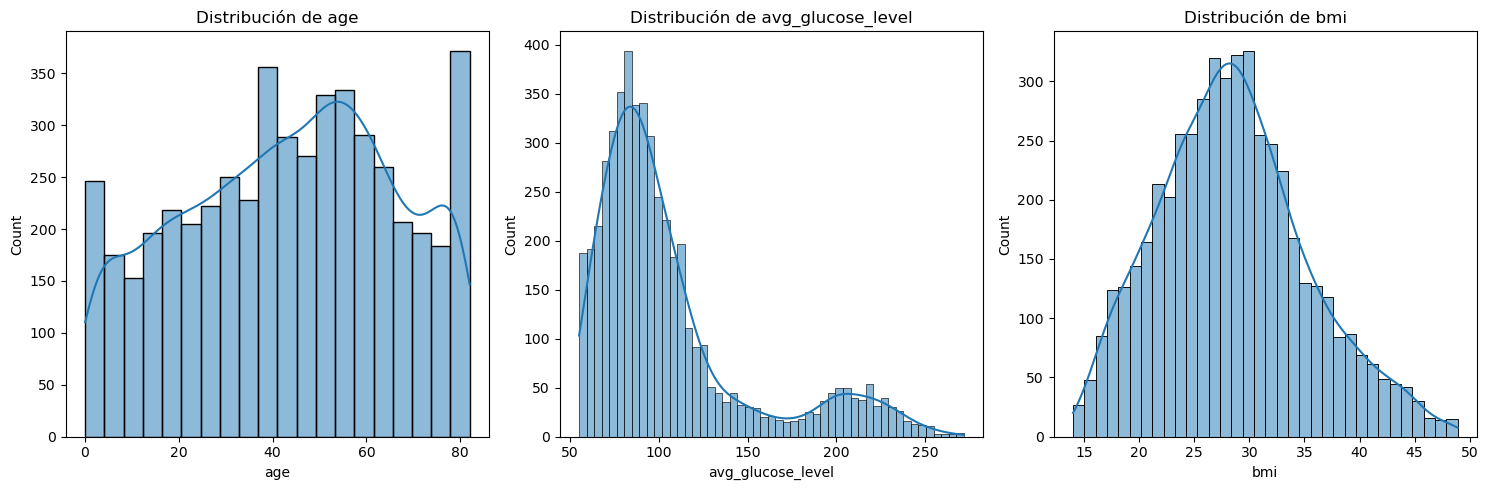

In [36]:
# Ignorar los 'warnings'
import warnings
# Paso 3: Visualización de la distribución de variables numéricas
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
num_cols = len(numeric_cols)
fig, axs = plt.subplots(1, num_cols, figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

- Existen dos picos en 'age', por debajo y por arriba.
- Existe un grupo significativo (no mayoritario) de personas con niveles muy altos de glucosa > 150 mg/dl (posible diabetes)
- La curva de BMI tiene una distribución simétrica de campana de Gauss, cercana a una distribución normal, con un pico sobre 30: hay un gran porcentaje de personas con sobrepeso. 


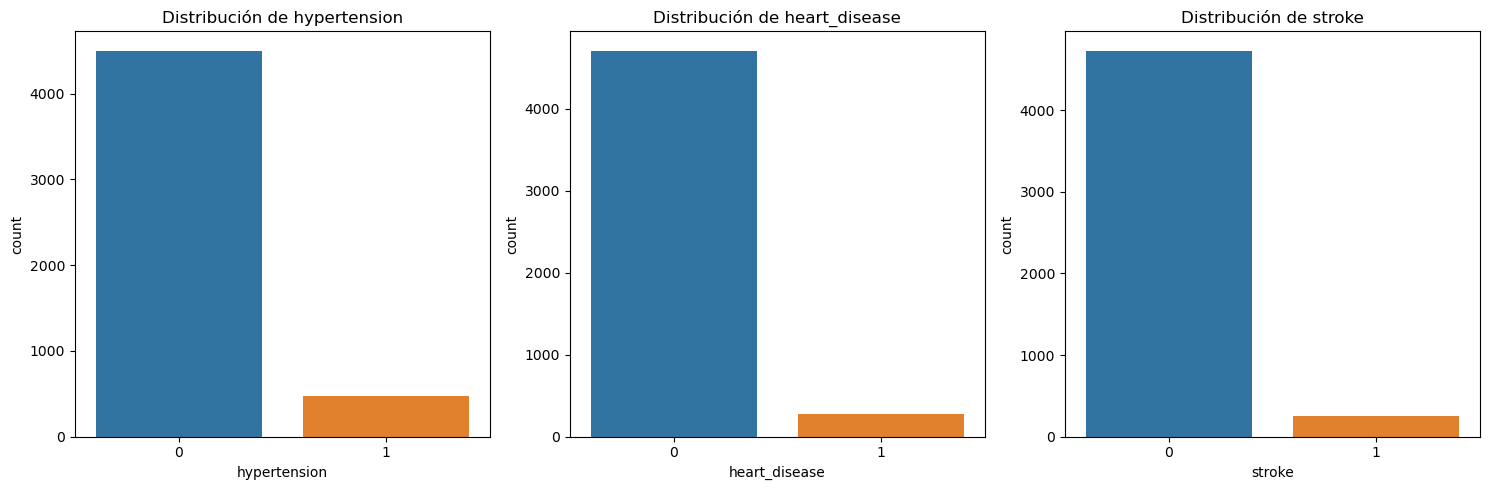

In [63]:
# Graficar las variables numéricas binarias con countplot
binary_cols = ['hypertension', 'heart_disease', 'stroke']
num_cols = len(binary_cols)
fig, axs = plt.subplots(1, num_cols, figsize=(15, 5))
for i, col in enumerate(binary_cols):
    sns.countplot(x=col, data=data, ax=axs[i])
    axs[i].set_title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

muy poco balanceadas

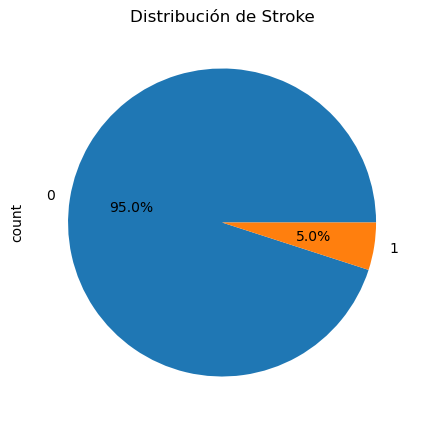

In [65]:
# Graficar la variable objetivo (stroke) donde se muestre el % de cada clase en una tarta
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data['stroke'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
plt.title('Distribución de Stroke')
plt.show()

La distribución de la variable objetivo no está nada balanceada.

### Duplicados

In [19]:
# Detectar duplicados
duplicates = data.duplicated()
print(duplicates.sum())

0


### Valores Nulos

In [20]:
# Detectar valores nulos
missing = data.isnull().sum()
print(missing)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


### Cardinalidad

In [47]:
# Analicemos la cardinalidad de las variables numéricas

# for col in data_num.columns:
#     print(col, data_num[col].nunique())
print("Cardinalidad de variables numéricas", "\n")
print(data.select_dtypes(include = ['float64', 'int64']).nunique())

Cardinalidad de variables numéricas 

age                   104
hypertension            2
heart_disease           2
avg_glucose_level    3895
bmi                   342
stroke                  2
dtype: int64


Hay muchos valores únicos en la variable edad. Analicemos máximos y mínimos

Maximum value:  82.0
Minimum value:  0.08


<Axes: ylabel='age'>

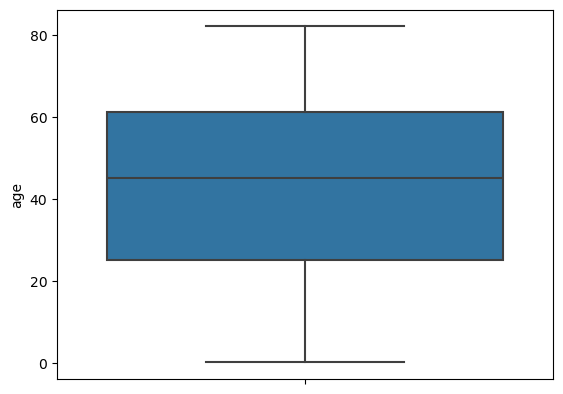

In [28]:
# Detectar máximo y mínimo de 'age'
print("Maximum value: ", data['age'].max())
print("Minimum value: ", data['age'].min())
# Detectar valores atípicos de 'age' con un boxplot y la edad en el eje y
sns.boxplot(y=data['age'])

posible alteración debido a que 'age' es un float. Redondear cuando hagamos ingeniería de características

In [44]:
# Imprimir todos los valores menores a 2 años en dos columnas los valores de 'age' y su correspondiente cantidad (valor único)
print(data[data['age'] < 2]['age'].value_counts())

age
1.80    9
1.32    8
1.64    8
1.08    7
1.88    7
1.24    7
1.48    6
1.72    6
0.32    5
1.00    5
0.56    5
0.24    5
0.88    5
0.72    5
0.64    4
1.56    4
0.80    4
1.40    3
1.16    3
0.48    3
0.40    2
0.08    2
0.16    1
Name: count, dtype: int64


In [48]:
# Analicemos la cardinalidad de las variables categóricas

print("Cardinalidad de variables categóricas", "\n")
print(data.select_dtypes(include = ['object']).nunique())


Cardinalidad de variables categóricas 

gender            2
ever_married      2
work_type         4
Residence_type    2
smoking_status    4
dtype: int64


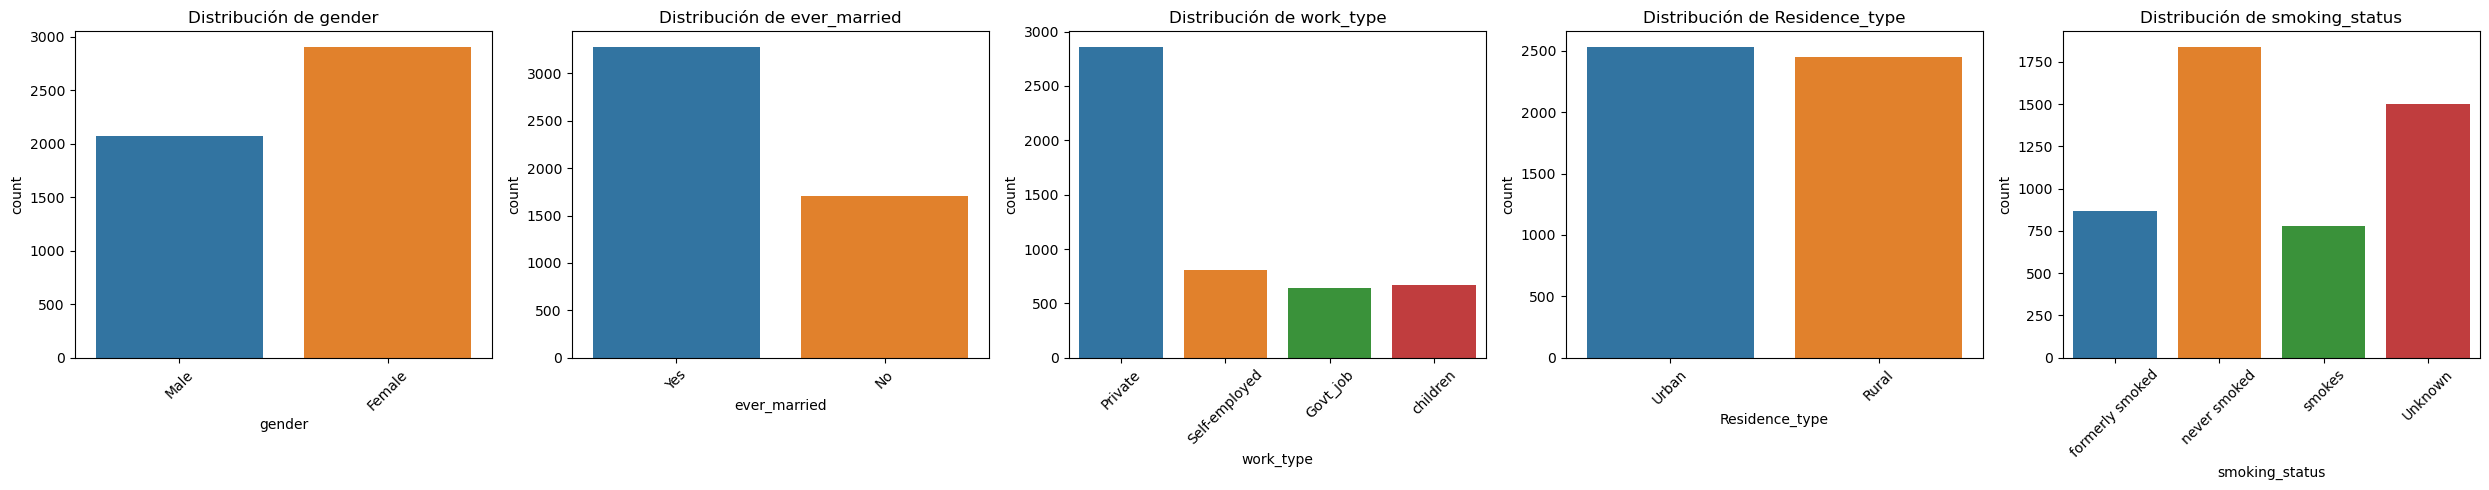

In [53]:
# Análisis de variables categóricas
fig, axs = plt.subplots(1, 5, figsize=(25, 5))  # 1 fila, 5 columnas para las gráficas

for i, col in enumerate(data_cat):
    sns.countplot(x=col, data=data, ax=axs[i])
    axs[i].set_title(f'Distribución de {col}')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


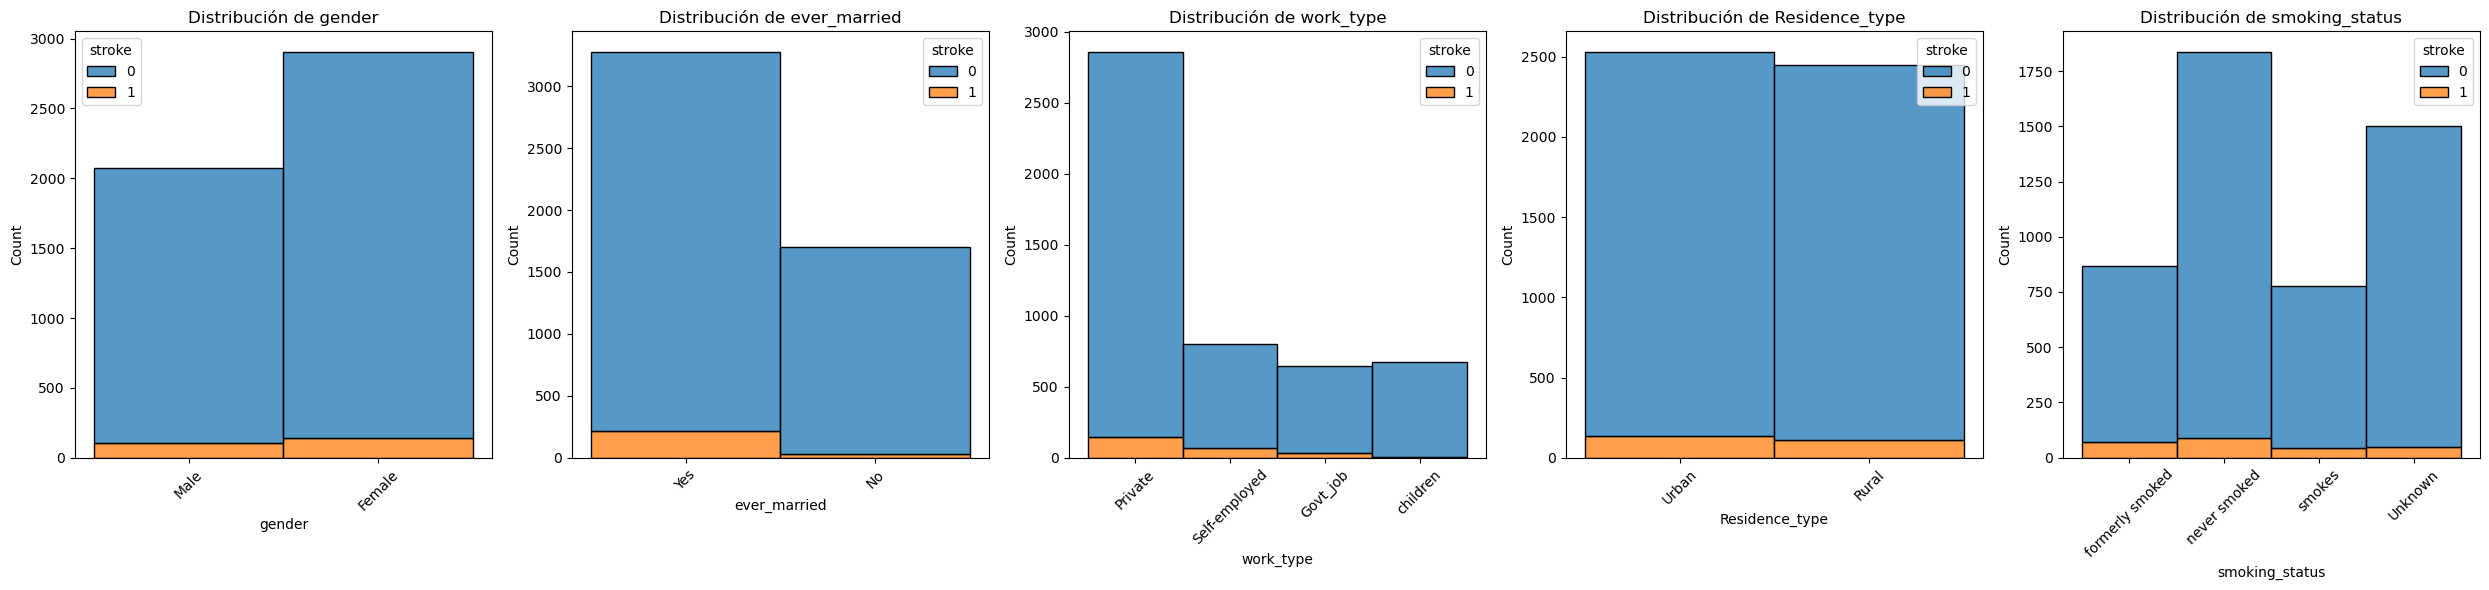

In [75]:
# Análisis de las variables categóricas con respecto a la variable objetivo (histogramas apilados)

fig, axs = plt.subplots(1, 5, figsize=(25, 6))  # 1 fila, 5 columnas para las gráficas

for i, col in enumerate(data_cat):
    sns.histplot(x=col, hue='stroke', data=data, multiple='stack', ax=axs[i])
    axs[i].set_title(f'Distribución de {col}')
    axs[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()


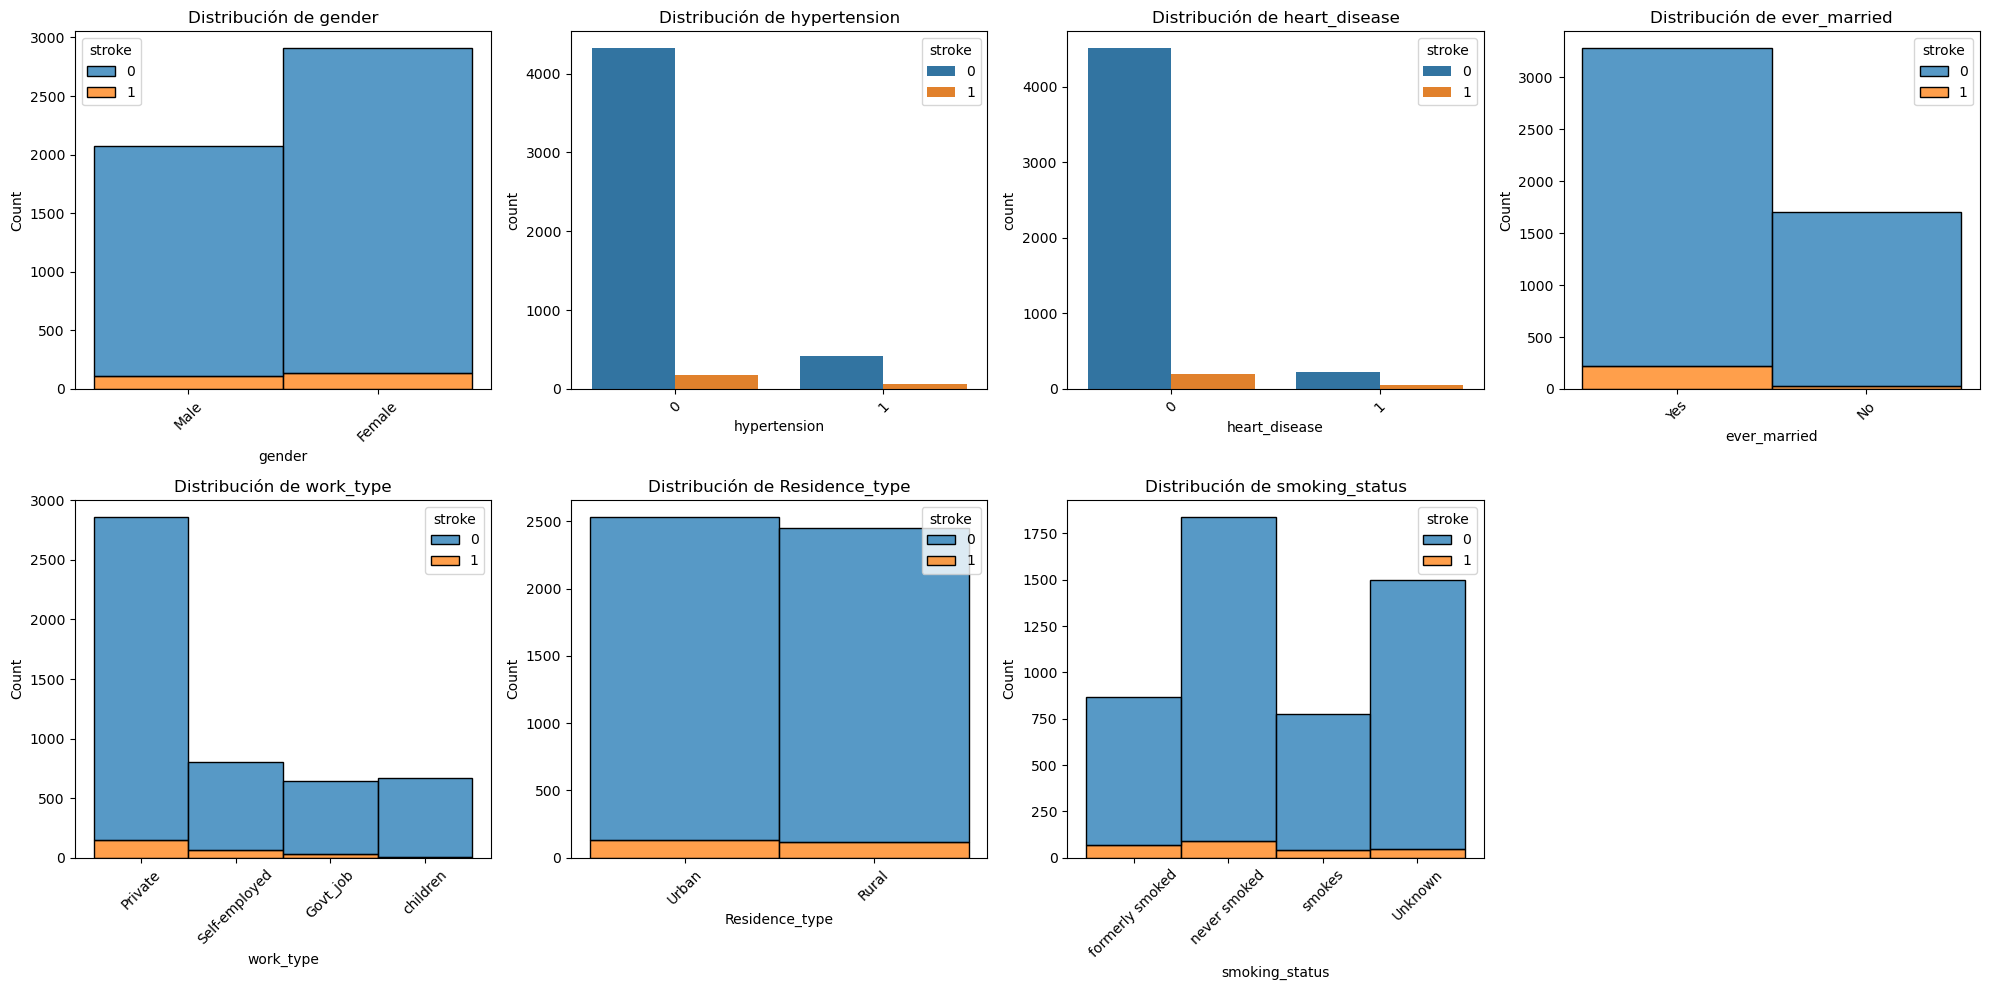

In [84]:
# Análisis de las variables categóricas con respecto a la variable objetivo (histogramas apilados) con stack

# Convertir la columna 'stroke' a un tipo categórico para evitar problemas con Seaborn
data['stroke'] = data['stroke'].astype(str)

data_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Configurar la figura con 2 filas y 4 columnas
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 filas, 4 columnas para las gráficas

for i, col in enumerate(data_categorical):
    row = i // 4  # Índice de fila
    col_idx = i % 4  # Índice de columna
    
    # Verificar si la columna es 'hypertension' o 'heart_disease' y usar countplot
    if col in ['hypertension', 'heart_disease']:
        sns.countplot(x=col, hue='stroke', hue_order=['0', '1'], data=data, ax=axs[row, col_idx])
    else:
        sns.histplot(x=col, hue='stroke', hue_order=['0', '1'], data=data, multiple='stack', ax=axs[row, col_idx])
    
    axs[row, col_idx].set_title(f'Distribución de {col}')
    axs[row, col_idx].tick_params(axis='x', rotation=45)

# Eliminar cualquier gráfico vacío si hay menos de 8 variables categóricas
for j in range(len(data_categorical), 8):
    fig.delaxes(axs[j // 4, j % 4])

plt.tight_layout()
plt.show()

- Hay más mujeres que hombres, pero no se aprecia correlación entre género e ictus. 

- Parece que hay una mayor predisposición a padecer ictus en las personas casadas. 

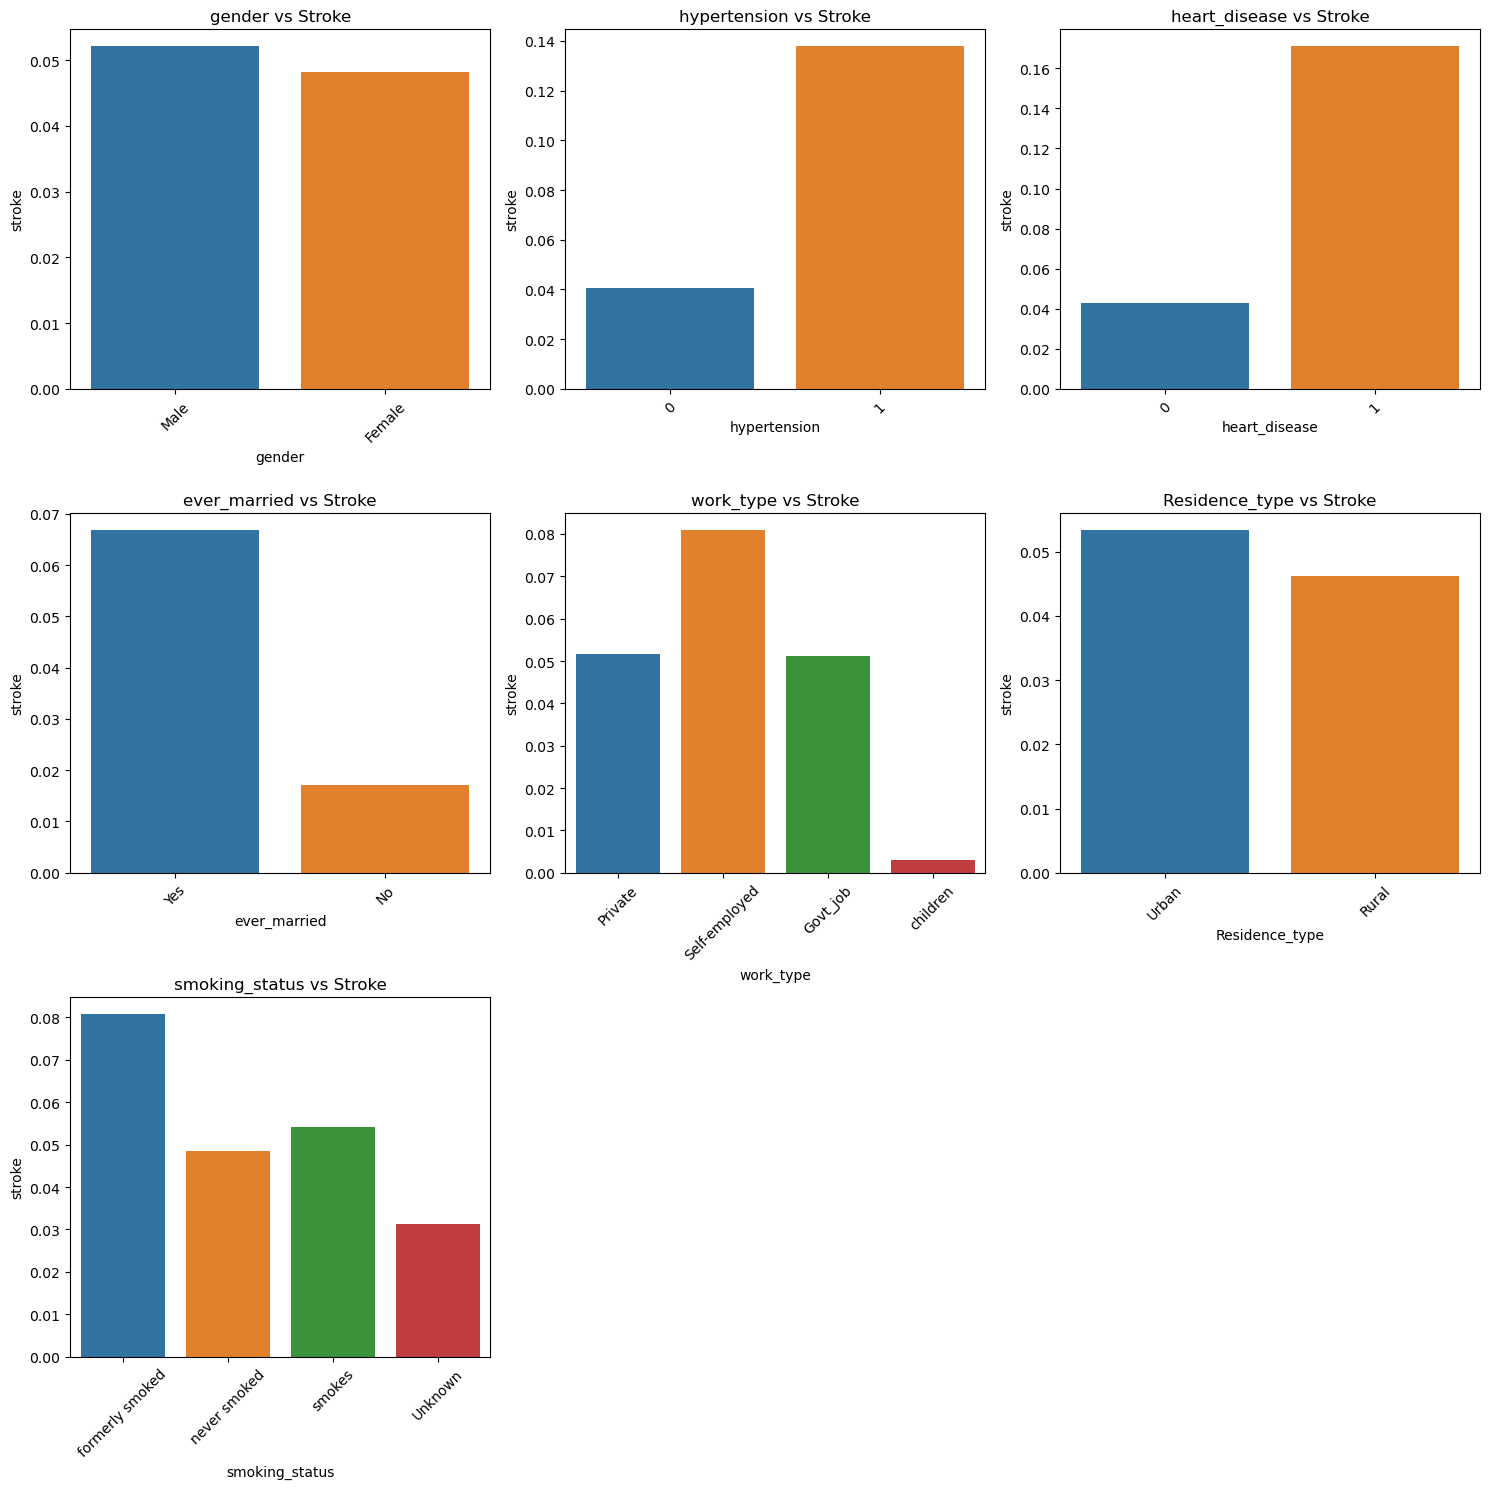

In [110]:
# Análisis de variables categóricas vs stroke (sin stack)

categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Configurar la figura con 3 filas y 3 columnas para acomodar 7 gráficos
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Graficar cada variable categórica contra 'stroke'
for i, col in enumerate(categorical_cols):
    sns.barplot(x=col, y='stroke', data=data, ax=axs[i // 3, i % 3], ci=None)
    axs[i // 3, i % 3].set_title(f'{col} vs Stroke')
    axs[i // 3, i % 3].tick_params(axis='x', rotation=45)

# Eliminar los gráficos vacíos si hay menos de 9 gráficos en total
for j in range(len(categorical_cols), 9):
    fig.delaxes(axs[j // 3, j % 3])

plt.tight_layout()
plt.show()

## Conclusiones de las relaciones entre las variables con ictus en porcentajes

1. Gender (género)

**Observación**: No parece haber una diferencia significativa en el porcentaje de ictus entre hombres y mujeres. Ambos géneros tienen un porcentaje similar, alrededor del 5%.

**Conclusión**: El género no parece ser un factor decisivo en el riesgo de sufrir un stroke en este conjunto de datos.

2. Hypertension (hipertensión)

**Observación**: Las personas con hipertensión tienen un porcentaje significativamente más alto de stroke comparado con aquellas que no la tienen.

**Conclusión**: La hipertensión es un factor de riesgo importante para sufrir un stroke, lo cual es consistente con lo que se sabe sobre la relación entre presión arterial alta y problemas cardiovasculares.

3. Heart Disease (enfermedad cardíaca)

**Observación**: El porcentaje de personas con stroke es mucho mayor en aquellas que tienen enfermedad cardíaca en comparación con las que no la tienen.

**Conclusión**: Tener una enfermedad cardíaca parece ser un factor de riesgo importante para sufrir un stroke.

4. Ever Married (estado civil)

**Observación**: Las personas que están casadas o han estado casadas tienen un porcentaje más alto de stroke en comparación con aquellas que nunca se han casado.

**Conclusión**: Podría ser interesante analizar esta relación con más detalle, ya que el estado civil podría estar correlacionado con otros factores como la edad, el estilo de vida o el nivel de estrés.

5. Work Type (tipo de trabajo)

**Observación**: El porcentaje de stroke es más alto en las personas que son "Self-employed" (trabajadores por cuenta propia), seguido de cerca por aquellos que tienen un "Govt_job" (trabajo en el gobierno) y "Private". El grupo de "children" tiene un porcentaje casi nulo.

**Conclusión**: El tipo de trabajo puede estar relacionado con el riesgo de sufrir un stroke, posiblemente debido a factores como el estrés laboral o el acceso a servicios de salud. El hecho de que el porcentaje sea casi nulo en el grupo de niños es esperable, ya que los strokes son muy raros en esa población.

6. Residence Type (tipo de residencia)

**Observación**: No hay una diferencia significativa en el porcentaje de stroke entre las personas que viven en áreas rurales y urbanas.

**Conclusión**: El tipo de residencia (rural o urbano) no parece ser un factor relevante en el riesgo de sufrir un stroke.

7. Smoking Status (estado de fumador)

**Observación**: Las personas que "formerly smoked" (fumaban anteriormente) y aquellas que "smoke" (fuman) actualmente tienen un porcentaje más alto de stroke en comparación con las que "never smoked" (nunca han fumado) o están en la categoría "Unknown".

**Conclusión**: Fumar es un factor de riesgo significativo para sufrir un stroke, lo cual está en línea con el conocimiento médico sobre los efectos negativos del tabaquismo en la salud cardiovascular.

**Conclusiones Generales**

- Factores de riesgo significativos: Hipertensión, enfermedad cardíaca y fumar se destacan como los factores más relevantes en el riesgo de sufrir un stroke.

- Factores menos relevantes: El género y el tipo de residencia parecen tener un impacto mucho menor en el riesgo.

- Aspectos para explorar: El estado civil y el tipo de trabajo podrían estar correlacionados con otros factores y merecen un análisis más detallado para comprender su influencia en el riesgo de stroke.

Estos análisis nos ayudan a identificar qué variables están más fuertemente asociadas con el riesgo de sufrir un stroke, lo que podría ser útil para enfoques preventivos y tratamientos dirigidos.

### Análisis de correlación

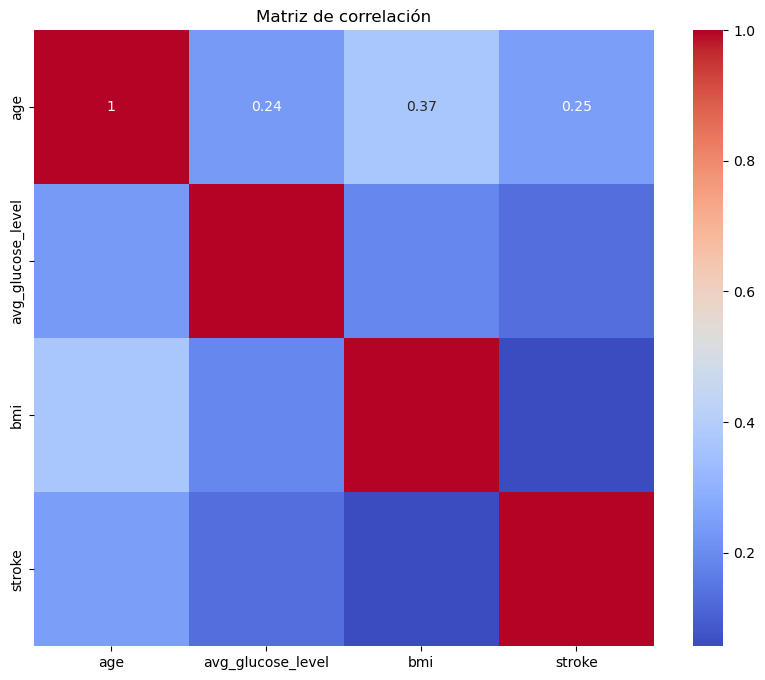

In [55]:
# Análisis de correlación
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
corr_matrix = data[numeric_cols + ['stroke']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

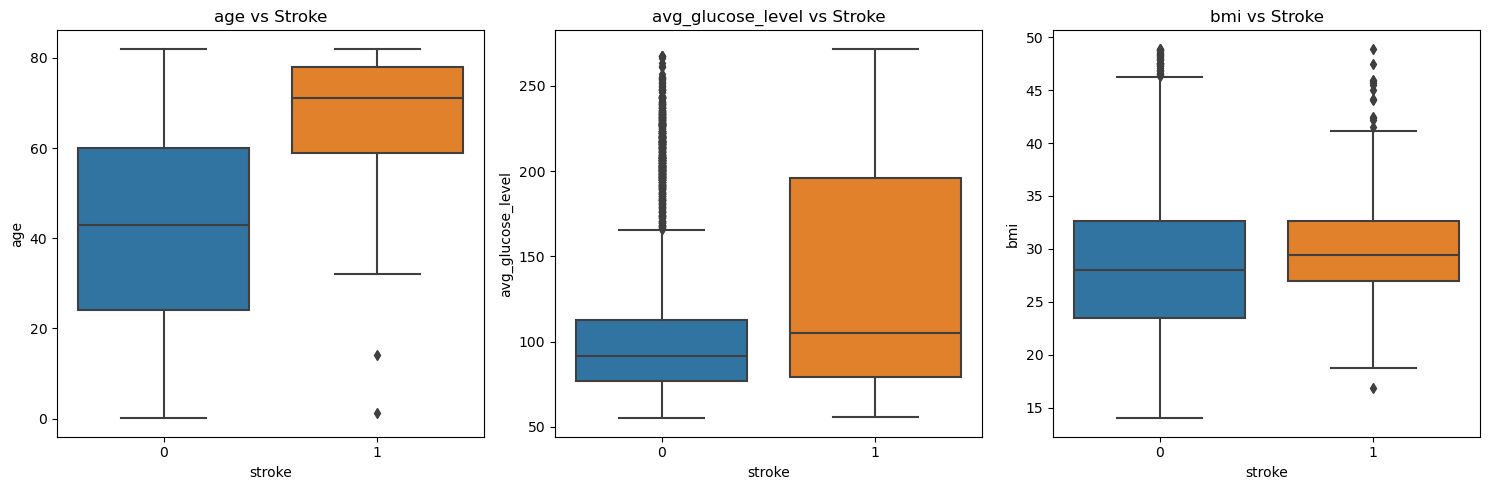

In [56]:
# Análisis bivariado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='stroke', y=col, data=data, ax=axs[i])
    axs[i].set_title(f'{col} vs Stroke')
plt.tight_layout()
plt.show()

- Hay una mayor tendencia a sufrir un ictus en personas mayores. Hay algunos valores atípicos.

- Hay una mayor relación entre niveles altos de glucosa e ictus, especialmente en el 3er quartil. Hay valores atípicos muy altos en la población que no ha sufrido ictus

- En el caso del BMI la diferencia entre las persona que han sufrido ictus y las que no no es tan clara como con la edad o el nivel de glucosa. 

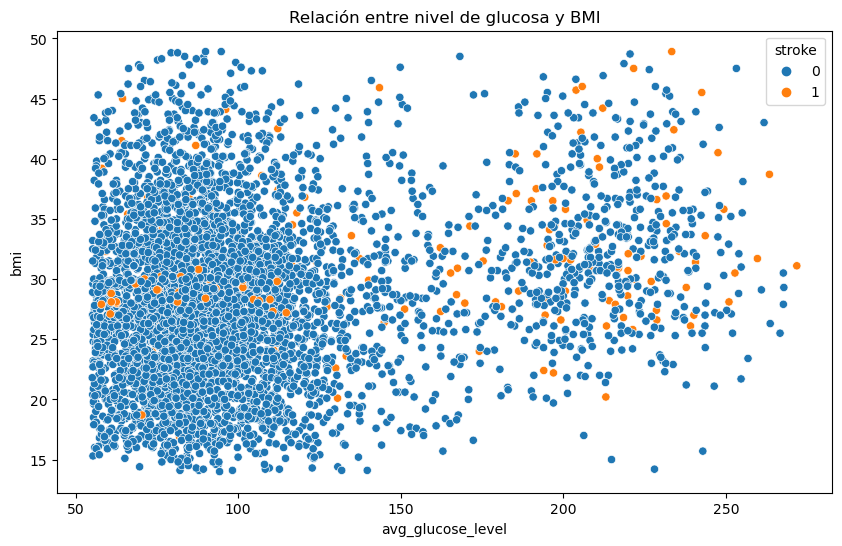

In [112]:
# Análisis de la relación entre glucosa y BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', data=data)
plt.title('Relación entre nivel de glucosa y BMI')
plt.show()

- Mayor densidad de puntos en rangos de glucosa y BMI bajos (saludable)

- Mayor densidad de ictus en niveles altos de glucosa

- Ligera tendencia positiva entre glucosa y BMI, pero no hay una correlación clara. 

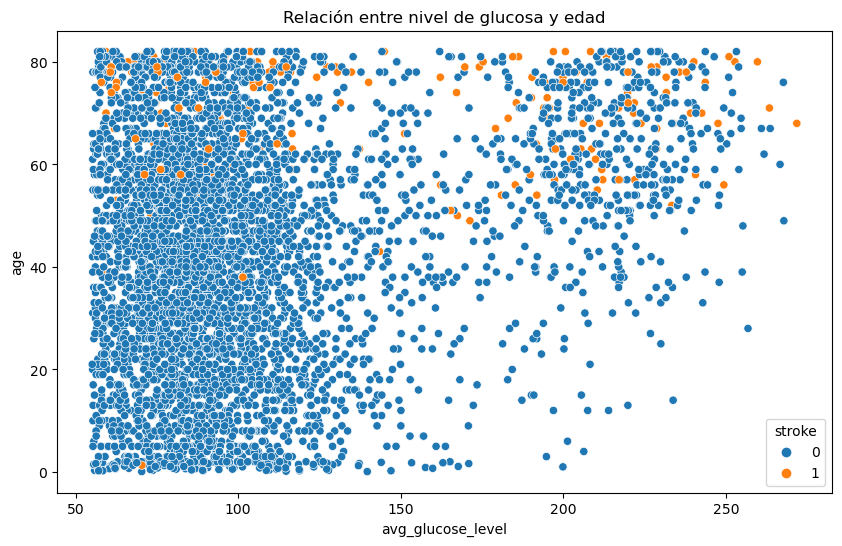

In [104]:
# Análisis de la relación entre glucosa y edad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='age', hue='stroke', data=data)
plt.title('Relación entre nivel de glucosa y edad')
plt.show()

- Mayor densidad de puntos en rangos de glucosa y edad bajos (saludable)

- Hay una mayor proporción clara de ictus en niveles altos de glucosa y edad. 

- Tendencia y correlación positiva entre glucosa y edad.